In [4]:
from src import generator
import src
from importlib import reload
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


6 7
9 12
3 7
3 11
6 7
3 8
7 12
3 4


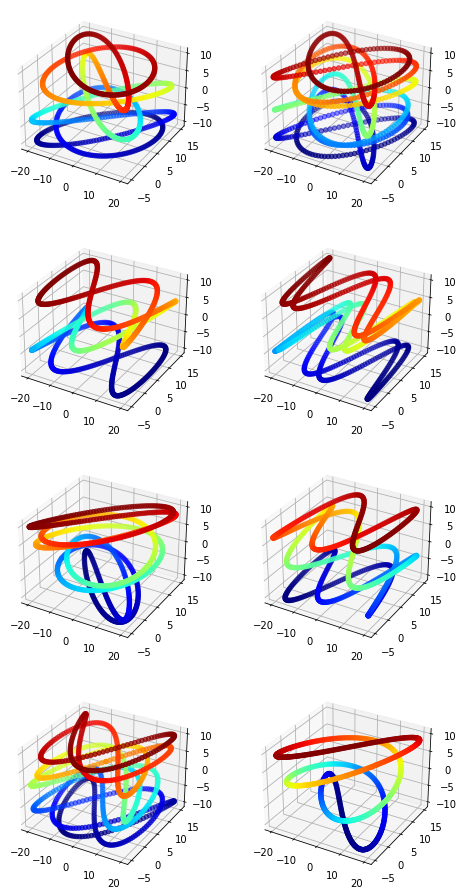

In [30]:
reload(generator)
# Number of trajectories:
number_of_trajectories = 8

# Number of points per trajectory:
number_of_points = 1000

min_x = -20
max_x = 20
min_y = -5
max_y = 15
min_z = -10
max_z = 10

SEED = 429471


dynamic = generator.DynamicTrajectory(min_x, max_x, min_y, max_y, min_z, max_z,sequence_len=number_of_points)
fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory
    trajectory = dynamic.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)


plt.savefig('lissajous.png', transparent=False, dpi=300)
plt.show()



